In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
def my_laplace(scale=1):
    u = np.random.uniform()
    b = np.random.randint(2)
    l = (2*b-1)*np.log(u)
    return l*scale

def is_in_U(x):
    a = x / (2 ** -53)
    b = x // (2 ** -53)
    return a == b

def is_scaled_laplace_img(y, scale):
    if y > 0:
        y = -y
    x = np.exp(y / scale)
    x2 = np.exp(np.log(x))
    if is_in_U(x) and scale * np.log(x2) == y and is_in_U(x2):
        return True
    else:
        return False

In [3]:
data = {True: 0, False: 0}
for _ in range(1000):
    u = np.random.uniform()
    boo = is_in_U(u)
    data[boo] += 1
    
data2 = {True: 0, False: 0}
for _ in range(1000):
    u = np.random.uniform()
    x = np.exp(np.log(u))
    boo = is_in_U(x)
    data2[boo] += 1

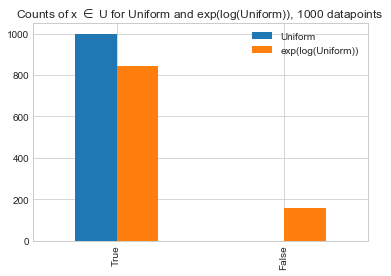

In [4]:
df = pd.DataFrame.from_dict({'Uniform': data, 'exp(log(Uniform))': data2})
df.plot.bar(title='Counts of x $\in$ U for Uniform and exp(log(Uniform)), 1000 datapoints')

In [5]:
it = itertools.product([True, False], repeat=2)
list(it)

[(True, True), (True, False), (False, True), (False, False)]

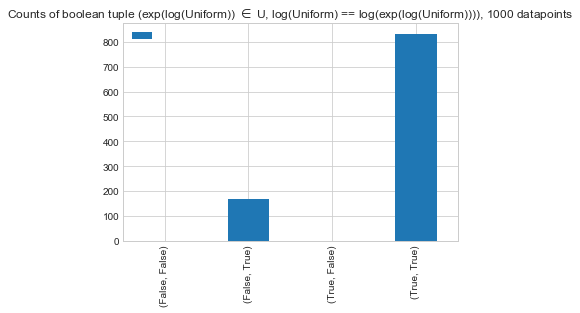

In [6]:
data3 = {}
for k in itertools.product([True, False], repeat=2):
    data3[k] = 0
for _ in range(1000):
    u = np.random.uniform()
    x = np.exp(np.log(u))
    boo1 = is_in_U(x)
    boo2 = (np.log(u) == np.log(x))
    data3[(boo1, boo2)] += 1

df = pd.DataFrame.from_dict({'': data3})
df.plot.bar(title='Counts of boolean tuple (exp(log(Uniform)) $\in$ U, log(Uniform) == log(exp(log(Uniform)))), 1000 datapoints')

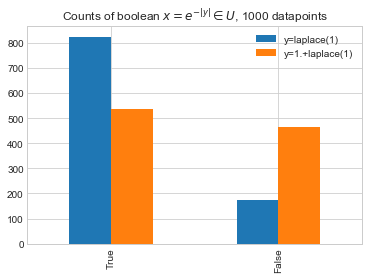

In [7]:
scale = 1

data6 = {True: 0, False: 0}
for _ in range(1000):
    y = my_laplace(scale)
    x = np.exp(-abs(y))
    boo = is_in_U(x)
    data6[boo] += 1

data7 = {True: 0, False: 0}
for _ in range(1000):
    y = my_laplace(scale) + 1.
    x = np.exp(-abs(y))
    boo = is_in_U(x)
    data7[boo] += 1

df = pd.DataFrame.from_dict({'y=laplace(1)': data6, 'y=1.+laplace(1)': data7})
df.plot.bar(title='Counts of boolean $x=e^{-|y|} \in U$, 1000 datapoints')

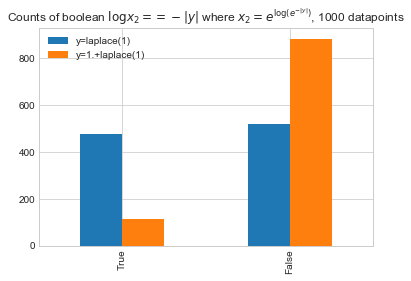

In [14]:
scale = 1

data6 = {True: 0, False: 0}
for _ in range(1000):
    y = my_laplace(scale)
    x = np.exp(-abs(y))
    x2 = np.exp(np.log(x))
    boo = (scale * np.log(x2) == y)
    data6[boo] += 1

data7 = {True: 0, False: 0}
for _ in range(1000):
    y = my_laplace(scale) + 1.
    x = np.exp(-abs(y))
    x2 = np.exp(np.log(x))
    boo = (scale * np.log(x2) == y)
    data7[boo] += 1

df = pd.DataFrame.from_dict({'y=laplace(1)': data6, 'y=1.+laplace(1)': data7})
df.plot.bar(title='Counts of boolean $\log x_2 == -|y|$ where $x_2=e^{\log(e^{-|y|})}$, 1000 datapoints')

In [8]:
scale = 1

data4 = {}
for k in itertools.product([True, False], repeat=3):
    data4[k] = 0
for _ in range(1000):
    y = my_laplace(scale)
    if y > 0:
        y = -y
    x = np.exp(y / scale)
    x2 = np.exp(np.log(x))
    key = (is_in_U(x), scale * np.log(x2) == y, is_in_U(x2))
    data4[key] += 1
    
data5 = {}
for k in itertools.product([True, False], repeat=3):
    data5[k] = 0
for _ in range(1000):
    y = 1. + my_laplace(scale)
    if y > 0:
        y = -y
    x = np.exp(y / scale)
    x2 = np.exp(np.log(x))
    key = (is_in_U(x), scale * np.log(x2) == y, is_in_U(x2))
    data5[key] += 1

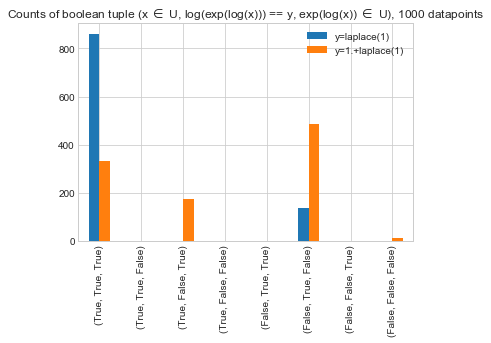

In [9]:
df = pd.DataFrame.from_dict({'y=laplace(1)': data4, 'y=1.+laplace(1)': data5})
df.plot.bar(title='Counts of boolean tuple (x $\in$ U, log(exp(log(x))) == y, exp(log(x)) $\in$ U), 1000 datapoints')